# Problem Statement : US Stock Market Performance and GDP Growth

## Introduction

During my classwork we took some time to work on the fundamental variables driving economics and stock market dynamics. The purpose of this notebook is to share a my understanding about few fundamental relationships that connect stock markets and macro economics fundamentals and share some remarks based on the evidence.

## Long Run Equilibrium Stock Markets and GDP Growth

Recent (Stewart,Piros,Heisler 2019) and longer dated research have demonstrated that long run GDP growth provides an anchor for long run stock market appreciation. In a very simplified way, researchers expect that the long term performance of the stock markets cannot exceed the real growth of the related economy. 
The fundamental variable connecting stock valuation and real growth is identified by real corporate profits, that are a predominant driver of stock market growth as well as a substantial component of the gross domestic product. Having defined $gdp$ as the logarithm growth of the real GDP and $p$ as the logarithm of the stock markets growth we can rewrite the fundamental relationship as

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~gdp ≃ p~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(1)$ 

## Chaining stock market valuation

The fundamental valuation of a stock market index depends greatly on the capacity of its stock to generate real (net of inflation) net profits. There are many complex model to address the fundamental valuation but here I want to share a simple one that allows to draw interesting conclusion. Before we need to define a few variables:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~P_t~~~ =$ Price level of a stock market index at time t$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(2)$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~e_t=~~~\frac{E_t}{GDP_t} =$ Share of GDP represented by corporate earnings at time t$~~~~~~~~~~~~~~~~~~~~~~~(3)$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PE_t~~~ =\frac{P_t}{E_t}$ Ratio of Price to Earnings for a stock index (S&P) at time t$~~~~~~~~~~~~~~~~~~~~~~~~~~~(4)$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~GDP_t~~~ =$ Gross Domestic Product (US) at time t$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(5)$

Let me comment shortly on (4): PE is one of the key valuation metrics in the practice for stock markets and represents how many USD investors are willing to pay for one dollar of corporate earnings for a stock index or a single stock. Historically high PE ratios are generally related to stock markets bubbles (such as Dotcom bubble in early 20's).The first time I approached this variable I wondered why an investor should be available to pay 20 USD of price (as an example) for each 1 USD of earnings. A possible explanation relies in earnings growth ($g$ in literature): the expectation that earnings will grow more than current. A higher earnings growth will translate in a higher price paid per USD of earnings.

Given the definitions in (2)-(3)-(4)-(5) we can represent the valuation of a stock index at a given time $t$ $(P_t)$ as a chain multiplication:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~P_t= \frac{E_t}{GDP_t}\times \frac{P_t}{E_t}\times GDP_t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(6)$

We can transform the multiplication in $(6)$ into summation with the application of the natural logarithm to both side of the $(6)$ we can obtain

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\ln{(P_t)}= \ln{(\frac{E_t}{GDP_t})} + \ln{(\frac{P_t}{E_t})} +\ln{(GDP_t)}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(7)$

Equation $(7)$ can be used to estimate price variation (capital gain) of a stock index in a finite interval of time $T-t$.
By subtracting $(7)$ to its realisation at a posterior time T (with $T>t$) the following form results

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\Delta\ln{(P_t)}= \Delta\ln{(\frac{E_T}{GDP_T})} + \Delta\ln{(\frac{P_T}{E_T})} +\Delta\ln{(GDP_T)}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(9)$

Where the following equalities hold

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\Delta\ln{(P_T)} = \ln{(P_T)}-\ln{(P_t)}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(10)$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\Delta\ln{(\frac{E_T}{GDP_T})} = \ln{(\frac{E_T}{GDP_T})}-\ln{(\frac{E_t}{GDP_t})}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(11)$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\Delta\ln{(\frac{P_T}{E_T})} = \ln{(\frac{P_T}{E_T})}-\ln{(\frac{P_t}{E_t})}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(12)$

Equation $(9)$ is related to the increase/decrease in the dollar price attributed to each dollar of earnings and for that reason is often referred as "repricing effect". Sharpe increases in repricing effect are often related to stock market bubbles (such as . com).
The last equation $(13)$ corresponds to the definition of real gdp growth over the interval $T-t$ and also corresponds to the variable $g$ as defined in equation $(1)$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\Delta\ln(GDP_T) =\ln(GDP_T)-\ln(GDP_t)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(13)$

### My understanding

From my understanding of the few economics lectures we had in my class a stock market cannot sustain in the long run a capital appreciation larger than the real growth rate of its economy.The reason for this relies in corporate profits which are the drivers of capital appreciation and also an important part of the gross domestic product of the economy. The real output growth provides a sort of long trend level for earnings growth. Deviations from this trend may happen from "repricing" of earnings (equation $12$) or from an increase of the share of earnings into GDP (equation $11$). These last two should average $0$ in the long term.

## Some evidence from data

The objective is here to give a look to the data and trying how the aforementioned variables behaved from 2000 to now. I framed my simplified model to US economy for the easiness of access to data. To this purpose I collected the needed data from the following sources: 

$\Delta\ln{(P_T)}$ : SP&500 index levels from Yahoo! Finance (^GSPC)

$\Delta\ln{(\frac{P_T}{E_T})}$ : SP&500 price to earnings (trailing 12 months) ratio from Bloomberg (SPX Index, field PE_RATIO)

$\Delta\ln{(GDP_T)}$ GDP growth from the Federal Reserve of St Louis
I downloaded the relevant series from their sources (as specified before) from 2000 on. I stored this dataset in .csv format and now I am using it to look at the data

$\Delta\ln{(\frac{E_T}{GDP_T})}$ Same source as for GDP. This variable is computed at constant prices (2012) to avoid the effect of inflation impacting the analysis

### Step 1 I import the python relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('ggplot')
from datetime import datetime
import os

### Step 2 I import the data and transform them into time variation over a regular interval of one quarter

In [2]:
path = 'fundamentals.csv'
df = pd.read_csv(path).set_index('Date');
#df['Date'] =pd.to_datetime(df['Date'], format='%d-%m-%Y')

#df['Date'] =df['Date'].astype(datetime)
#df['Date'] =df['Date'].apply(lambda x:datetime.fromisoformat(str.replace(str(x)[:10],'\\','-')).strftime('%d-%m-%Y'))
#df.set_index('Date')
#df =df.sort_index();
dlogps = np.log( df['SPX Index  (L3)']/df['SPX Index  (L3)'].shift(1) ).dropna() 
dloggrowth = np.log((1+ df['GDP CQOQ Index  (L2)']/4/100)/(1+df['GDP CQOQ Index  (L2)'].shift(1)/4/100) ).dropna()
dlogpe = np.log( df['SPX Index  (R2)']/df['SPX Index  (R2)'].shift(1) ).dropna()
profitshareofgdp = df['CPFTBTAX Index  (R3)']/df['GDP CHWG Index  (R4)']
dlogprofitshareofgdp = np.log( profitshareofgdp/profitshareofgdp.shift(1) ).dropna()

### Step 3 I compute the cumulated growth of each component. It corresponds to rebasing to 1 at start for each of the cumulated growth

In [5]:
df['Normalized Output Growth'] =np.exp( df['GDP CQOQ Index  (L2)'] /100/4).cumprod()
df['Normalized  Profit Shares of GDP'] = np.exp( dlogprofitshareofgdp).cumprod()
df['Normalized S&P Price'] = np.exp( dlogps).cumprod()
df['Normalized PE'] =np.exp( dlogpe).cumprod()

#cumgdpgrowth = np.exp( df['GDP CQOQ Index  (L2)'] /100/4).cumprod()
#cumprofitshareofgdp = np.exp( dlogprofitshareofgdp).cumprod()
#cummarketgrowth = np.exp( dlogps).cumprod() 
#cumpe = np.exp( dlogpe).cumprod()
#print(dlogps)

### Step 4 I compute the cumulated growth of each component. It corresponds to rebasing to 1 at start for each of the cumulated growth

C:\Users\spi\AppData\Local\Temp\ipykernel_804\2747258804.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels1,  ha='right',fontweight='bold',fontsize =fsize)
C:\Users\spi\AppData\Local\Temp\ipykernel_804\2747258804.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels2,  ha='right',fontweight='bold',fontsize =fsize)


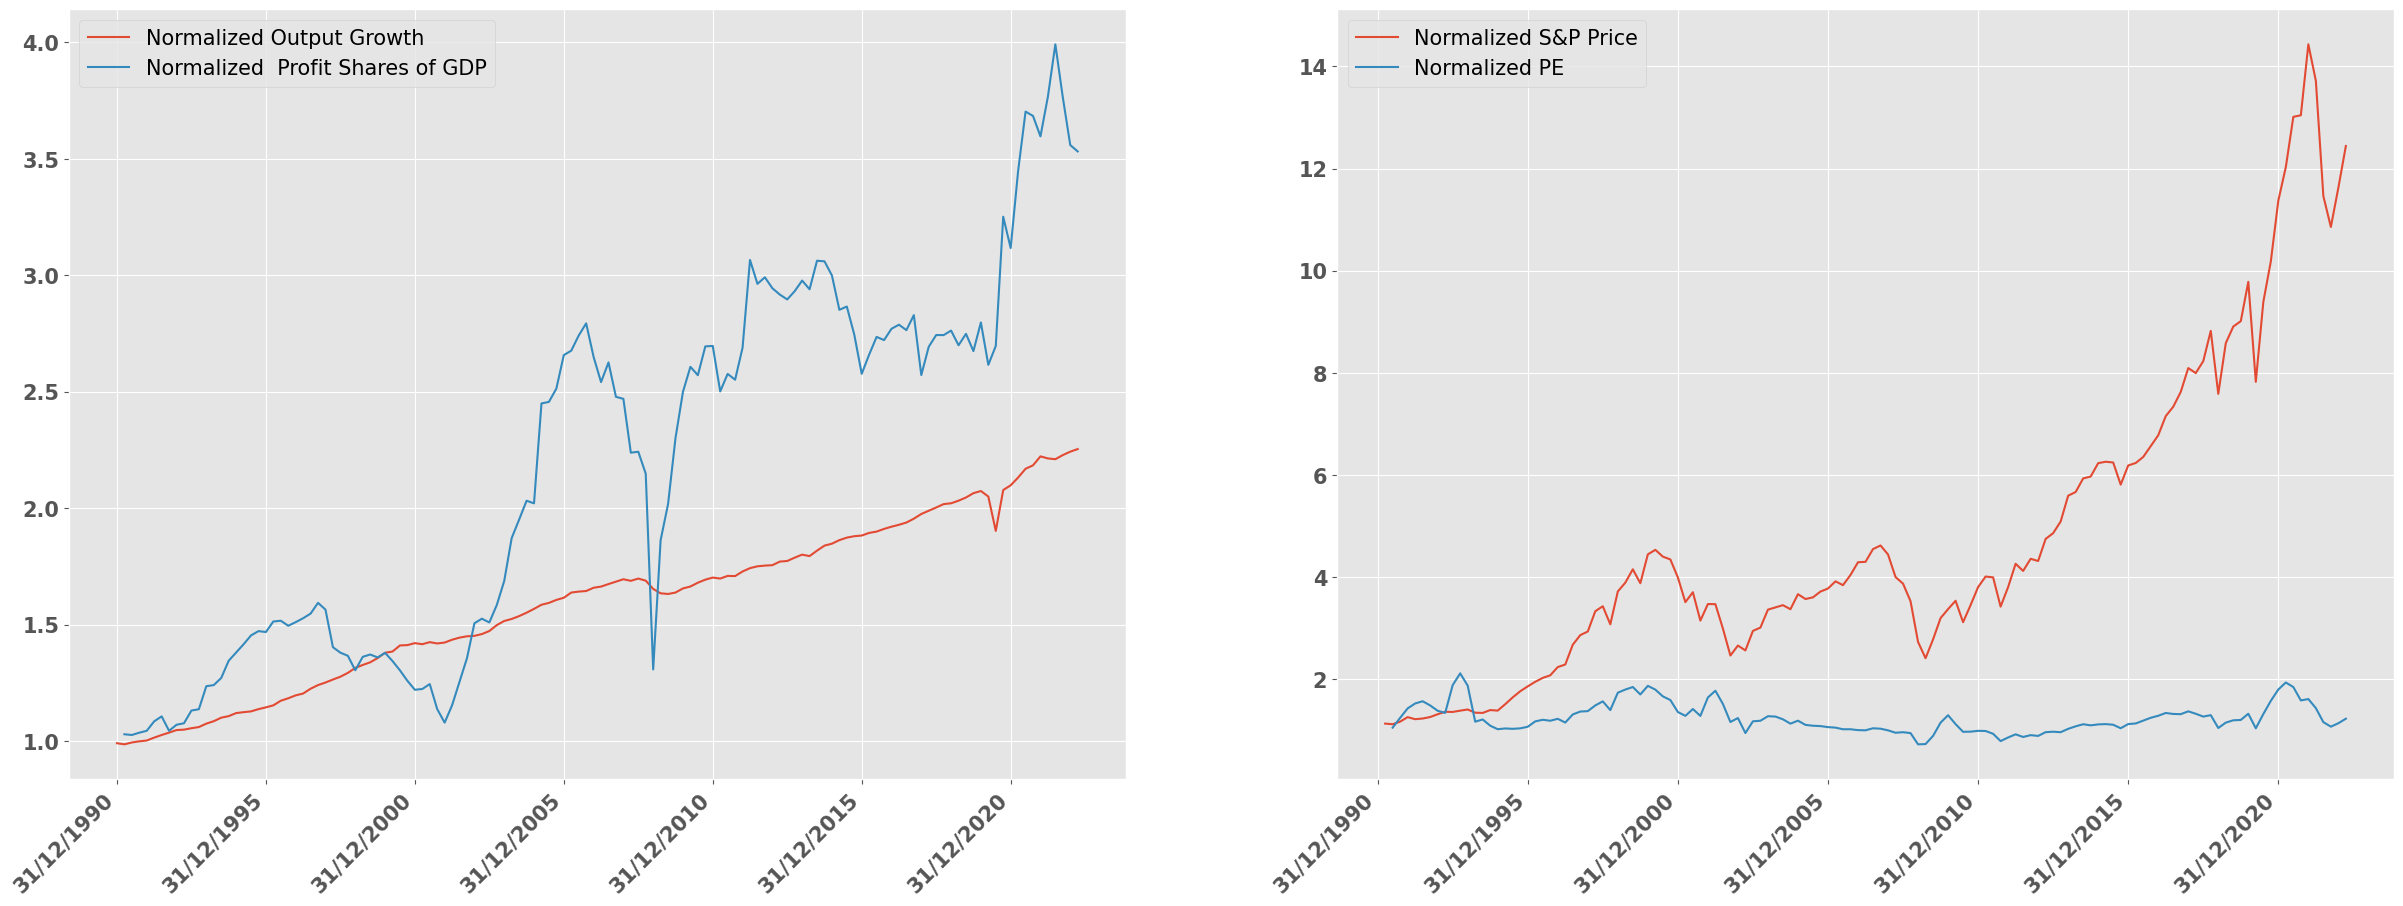

,Normalized Output Growth,Normalized Profit Shares of GDP,Normalized S&P Price,Normalized PE
Date,,,,
31/03/2023,2.254098,3.53207,12.444158,1.232181


In [10]:
fig1 = plt.figure(figsize = (30,10))
grid_size = (1,2)
ax1 = plt.subplot2grid(grid_size, (0,0))
ax2 = plt.subplot2grid(grid_size, (0,1))
fsize = 15
df.plot(y =['Normalized Output Growth','Normalized  Profit Shares of GDP'], ax = ax1)
df.plot(y =['Normalized S&P Price','Normalized PE'], ax = ax2)
xlabels1 =ax1.get_xticklabels()
xlabels2 =ax2.get_xticklabels()
ax1.set_xticklabels(xlabels1, rotation=45, ha='right',fontweight='bold',fontsize =fsize)
ax1.set_xlabel('')
ax2.set_xticklabels(xlabels2, rotation=45, ha='right',fontweight='bold',fontsize =fsize)
ax2.set_xlabel('')
ylabels1 =ax1.get_yticklabels()
ylabels2 =ax2.get_yticklabels()
ax1.set_yticklabels(ylabels1,  ha='right',fontweight='bold',fontsize =fsize)
ax2.set_yticklabels(ylabels2,  ha='right',fontweight='bold',fontsize =fsize)
ax1.legend(fontsize = 15);
ax2.legend(fontsize = 15);
plt.show()


#### Ending values of variables

In [12]:
endingmultiples =df[['Normalized Output Growth','Normalized  Profit Shares of GDP','Normalized S&P Price','Normalized PE']].tail(1)
endingmultiples

,Normalized Output Growth,Normalized Profit Shares of GDP,Normalized S&P Price,Normalized PE
Date,,,,
31/03/2023,2.254098,3.53207,12.444158,1.232181


### Conclusion

From the charts and the ending values of cumulated growht rates it is possible to observe that GDP at constant prices is 2.26 times bigger than that of 2000, while S&P price is 12.4 times.Corporate profits are now 3.5 times their share in 2000 and PE is 1.23 times its initial level. 
Applying the simple chain rule in (6) would reult into a final factor of 9.5 then roughly 2.9 points are missing from the realized 12.4.
One important component missing is inflation that impact stock prices but does not impact GDP growth because I used constant prices series while stock index prices aren't.
Let's do for the moment the assumption that inflation is the missing piece in the chain rule and keeping it into account we match exactly 12.3.

From $\Delta(P/E)$ growth it is possible to see that it contributed to increase index prices by a factor equal to 1.23 at the end of March 23 (from Jan 2000) while theory predicts that it should be neutral on the long run.
Based on this analysis, US stock market at March 23 looks still 23% overvalued compared to real growth. It is a large and long lasting increase in the dollar price paid by stock markets for one dollar of earnings. It seems to imply that markets are confident in a large future growth of corporate profits.   

### Q&A

As mentioned I am a "class terminale" student that wanted to share his interest in financial markets and economics, trying to formalize some ideas.
I hope the reader will appreciate and will share with me her suggestion or give further direction, by posting her thougs in the GitHub blog that is accompanying this little work.
There are no rules apart reciprocal respect and politness